# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Nadine Putri Larasati
- **Email:** CDCC288D6X0419@student.devacademy.id / teenagedirtrag@gmail.com
- **ID Dicoding:** nadineputri

## Menentukan Pertanyaan Bisnis

- Bagaimana performa pengiriman (delivery time dan keterlambatan) pada order berstatus delivered selama periode 2016-2018 serta kategori produk mana yang paling sering mengalami keterlambatan?
- Kategori produk apa yang memberikan kontribusi pendapatan (revenue) tertinggi selama periode 2016-2018 serta bagaimana tren penjualannya dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Tujuan Gathering Data**

Pada tahap ini dilakukan proses pengumpulan dataset yang akan digunakan dalam analisis. Dataset E-Commerce Public Dataset terdiri dari beberapa tabel yang saling terhubung melalui primary key dan foreign key.

Tujuan tahap ini adalah:
- Mengidentifikasi struktur masing-masing tabel
- Memahami hubungan antar tabel
- Mengetahui jumlah data dan tipe data awal
- Mengidentifikasi potensi permasalahan data sebelum masuk ke tahap Cleaning Data

**Dataset yang Digunakan**

Pada tahap Gathering Data, proses eksplorasi difokuskan pada empat dataset utama:
- orders_dataset
- order_items_dataset
- customers_dataset
- products_dataset

Keempat dataset ini dipilih karena merepresentasikan struktur inti transaksi e-commerce yang mencakup informasi pesanan, detail item transaksi, data pelanggan, dan atribut produk. Dataset tersebut sudah cukup untuk membangun analisis utama seperti perhitungan revenue, identifikasi produk terlaris, analisis perilaku pelanggan, dan tren transaksi. Lima dataset lainnya bersifat sebagai data pendukung yang digunakan untuk analisis lanjutan seperti metode pembayaran, kepuasan pelanggan, performa seller, atau analisis geografis. Oleh karena itu, tahap ini difokuskan pada tabel yang paling relevan terhadap struktur transaksi utama.

In [14]:
# Load dataset
orders = pd.read_csv("orders_dataset.csv")
order_items = pd.read_csv("order_items_dataset.csv")
customers = pd.read_csv("customers_dataset.csv")
products = pd.read_csv("products_dataset.csv")

**1. orders**

In [15]:
# Lihat 5 baris pertama orders
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [16]:
# Info dataset orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [17]:
# Ukuran dataset orders (rows, columns)
orders.shape

(99441, 8)

**Insight orders_dataset.csv:**
- Dataset terdiri dari 99.441 baris dan 8 kolom
- Kolom order_id bersifat unik sehingga dapat digunakan sebagai primary key
- Kolom customer_id menghubungkan dataset ini dengan tabel customers_dataset
- order_status berisi status transaksi
- Beberapa kolom timestamp (order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date) masih bertipe object, sehingga perlu dikonversi ke datetime pada tahap Cleaning Data
- Beberapa kolom tanggal memiliki missing value yang perlu diperhatikan untuk analisis waktu pengiriman
- Dataset ini menjadi pusat relasi dengan tabel lain untuk membentuk master table transaksi

**2. order_items**

In [18]:
# Lihat 5 baris pertama order_items
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [19]:
# Info dataset order_items
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
# Ukuran dataset order_items (rows, columns)
order_items.shape

(112650, 7)

**Insight order_items_dataset.csv:**
- Dataset terdiri dari 112.650 baris dan 7 kolom
- Kolom order_id merupakan foreign key yang terhubung dengan tabel orders_dataset
- Kombinasi order_id dan order_item_id dapat digunakan sebagai composite primary key karena satu order dapat memiliki lebih dari satu item
- Kolom product_id menghubungkan dataset ini dengan tabel products_dataset
- Kolom seller_id menghubungkan dataset ini dengan tabel sellers_dataset
- Kolom shipping_limit_date masih bertipe object sehingga perlu dikonversi ke datetime pada tahap Cleaning Data
- Kolom price dan freight_value bertipe float64 dan dapat digunakan untuk menghitung total revenue (price + freight_value)
- Tidak terdapat missing value pada seluruh kolom
- Dataset ini merupakan tabel transaksi detail (item-level) yang sangat penting untuk analisis pendapatan, performa seller, dan produk terlaris. Alasannya yaitu karena orders = level order, order_items = level item (detail transaksi), dan revenue dihitung dari sini (bukan dari orders)



**3. customers**

In [21]:
# Lihat 5 baris pertama customers
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [22]:
# Info dataset customers
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [23]:
# Ukuran dataset customers (rows, columns)
customers.shape

(99441, 5)

**Insight customers_dataset.csv:**
- Dataset terdiri dari 99.441 baris dan 5 kolom
- Kolom customer_id merupakan primary key dan terhubung dengan tabel orders_dataset
- Kolom customer_unique_id merepresentasikan identitas unik pelanggan, sehingga satu pelanggan dapat memiliki beberapa customer_id jika melakukan beberapa transaksi
- Tidak terdapat missing value pada seluruh kolom
- Kolom customer_zip_code_prefix bertipe int64 dan dapat digunakan untuk analisis wilayah
- Kolom customer_city dan customer_state dapat digunakan untuk analisis persebaran pelanggan berdasarkan lokasi geografis
- Dataset ini penting untuk analisis segmentasi pelanggan, distribusi geografis, dan identifikasi repeat customer
- Perbedaan antara customer_id (level transaksi) dan customer_unique_id (level individu) sangat krusial. Insight ini dapat digunakan saat ingin menganalisis jumlah pelanggan unik dengan memakai customer_unique_id serta jumlah transaksi dengan memakai customer_id

**4. products**

In [24]:
# Lihat 5 baris pertama products
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [25]:
# Info dataset products
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [26]:
# Ukuran dataset products (rows, columns)
products.shape

(32951, 9)

**Insight products_dataset.csv:**
- Dataset terdiri dari 32.951 baris dan 9 kolom
- Kolom product_id bersifat unik dan dapat digunakan sebagai primary key
- Kolom product_category_name menghubungkan dataset ini dengan tabel product_category_name_translation
- Terdapat missing value pada beberapa kolom terutama product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty. Banyaknya missing value pada atribut deskriptif bisa memengaruhi analisis kategori atau karakteristik produk
- Sebagian besar kolom numerik bertipe float64 meskipun merepresentasikan jumlah (misalnya panjang nama dan jumlah foto) sehingga perlu evaluasi tipe data pada tahap Cleaning Data
- Dataset ini penting untuk analisis kategori produk, karakteristik produk, serta pengaruh atribut produk terhadap penjualan
- Kolom seperti product_name_lenght serta product_description_lenght dapat digunakan untuk analisis perbandingan penjualan antara produk dengan deskripsi panjang dan pendek
- Dimensi dan berat bisa digunakan untuk analisis biaya pengiriman serta korelasi berat dengan freight_value (join dengan order_items)

### Assessing Data

**Tujuan Assessing Data**

Pada tahap ini dilakukan pemeriksaan kualitas data untuk mengidentifikasi potensi permasalahan yang dapat memengaruhi hasil analisis. Pemeriksaan meliputi identifikasi missing value, duplicate data, invalid value, dan indikasi outlier pada kolom numerik. Proses ini bertujuan untuk memastikan data berada dalam kondisi layak sebelum masuk ke tahap Cleaning Data.

**1. orders**

In [27]:
# Cek missing value orders
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [28]:
# Cek duplicate orders
orders.duplicated().sum()

np.int64(0)

In [29]:
# Cek statistik numerik orders (deteksi outlier awal)
orders.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight orders_dataset.csv:**
- Terdapat missing value pada kolom order_approved_at (160 data), order_delivered_carrier_date (1.783 data), dan order_delivered_customer_date (2.965 data)
- Tidak ditemukan duplicate data
- Seluruh order_id bersifat unik (unique = 99.441) sehingga tidak terdapat indikasi duplikasi primary key
- Kolom order_status memiliki 8 kategori dengan mayoritas status adalah delivered (96.478 transaksi)
- Tidak terdapat indikasi invalid value berdasarkan struktur data
- Permasalahan utama pada dataset ini adalah missing value pada beberapa kolom timestamp yang perlu ditangani pada tahap Cleaning Data

**2. order_items**

In [30]:
# Cek missing value order_items
order_items.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [31]:
# Cek duplicate order_items
order_items.duplicated().sum()

np.int64(0)

In [32]:
# Cek statistik numerik order_items (deteksi outlier awal)
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight order_items_dataset.csv:**
- Tidak ditemukan missing value pada seluruh kolom
- Tidak ditemukan duplicate data
- Kolom order_item_id memiliki nilai maksimum 21 yang menunjukkan bahwa satu order dapat terdiri dari beberapa item
- Kolom price memiliki rentang nilai yang cukup lebar (min = 0.85, max = 6.735) yang mengindikasikan potensi outlier pada harga produk
- Kolom freight_value juga memiliki variasi yang cukup tinggi (min = 0.00, max = 409.68) yang berpotensi mengandung outlier
- Dataset ini secara struktur sudah bersih. Namun, perlu dilakukan analisis lanjutan untuk mendeteksi outlier pada kolom numerik menggunakan metode IQR

**3. customers**

In [33]:
# Cek missing value customers
customers.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [34]:
# Cek duplicate customers
customers.duplicated().sum()

np.int64(0)

In [35]:
# Cek statistik numerik customers (deteksi outlier awal)
customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Insight customers_dataset.csv:**
- Tidak ditemukan missing value pada seluruh kolom
- Tidak ditemukan duplicate data
- Seluruh customer_id bersifat unik (unique = 99.441)
- Terdapat 96.096 customer_unique_id yang menunjukkan bahwa beberapa pelanggan melakukan lebih dari satu transaksi
- Kota dengan frekuensi pelanggan tertinggi adalah sao paulo dan state terbanyak adalah SP
- Tidak terdapat indikasi invalid value maupun inkonsistensi struktur data

**4. products**

In [36]:
# Cek missing value products
products.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [37]:
# Cek duplicate products
products.duplicated().sum()

np.int64(0)

In [38]:
# Cek statistik numerik products (deteksi outlier awal)
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight products_dataset.csv:**
- Terdapat missing value pada kolom product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty masing-masing sebanyak 610 data
- Terdapat 2 missing value pada kolom dimensi dan berat (product_weight_g, product_length_cm, product_height_cm, product_width_cm)
- Tidak ditemukan duplicate data
- Kolom product_weight_g memiliki rentang nilai yang cukup besar (min = 0 gram, max = 40.425 gram), yang mengindikasikan kemungkinan outlier atau data tidak akurat (berat 0 gram perlu diverifikasi)
- Kolom product_description_lenght memiliki variasi sangat tinggi (max = 3.992) yang berpotensi mengandung outlier
- Dataset ini memiliki permasalahan utama berupa missing value dan potensi outlier pada atribut numerik yang perlu ditangani pada tahap Cleaning Data

### Cleaning Data

**Tujuan Cleaning Data**

Pada tahap ini dilakukan proses pembersihan data berdasarkan permasalahan yang telah diidentifikasi pada tahap Assessing Data. Proses pembersihan dilakukan menggunakan pendekatan define, code, dan test untuk memastikan setiap tindakan terdokumentasi dengan jelas dan menghasilkan data yang lebih berkualitas.

Permasalahan utama yang ditemukan meliputi:
- Missing value pada dataset orders dan products
- Potensi outlier pada kolom numerik di order_items dan products
- Tipe data timestamp yang masih bertipe object
- Tidak ditemukan duplicate data sehingga tidak diperlukan penghapusan duplikasi

**1. orders**

Masalah:
- Missing value pada beberapa kolom timestamp
- Kolom timestamp masih bertipe object
- Terdapat berbagai status order yang menyebabkan data pengiriman tidak lengkap

Strategi:
- Konversi seluruh kolom timestamp ke tipe datetime
- Filter dataset hanya pada order dengan status delivered agar analisis pengiriman lebih akurat
- Hapus sisa missing value pada kolom timestamp karena jumlahnya sangat kecil dan tidak signifikan

In [39]:
orders['order_status'].value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


Note:

Berdasarkan distribusi order_status, mayoritas order berstatus delivered (96.478 dari 99.441). Missing value pada kolom tanggal pengiriman dan penerimaan terjadi karena tidak semua order mencapai tahap pengiriman (misalnya canceled atau unavailable). Untuk analisis performa pengiriman dan durasi delivery, dataset difilter hanya pada order dengan status delivered agar analisis lebih akurat.

In [40]:
# Convert timestamp columns ke datetime
date_columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for col in date_columns:
    orders[col] = pd.to_datetime(orders[col])

# Filter hanya order dengan status delivered
orders = orders[orders["order_status"] == "delivered"].copy()

# Cek missing value setelah difilter
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,2
order_delivered_customer_date,8
order_estimated_delivery_date,0


In [41]:
orders = orders.dropna(subset=[
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date"
])

# Cek ulang
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [42]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


**Insight orders_dataset.csv:**
- Seluruh kolom timestamp berhasil dikonversi ke tipe data datetime64[ns] sehingga siap digunakan untuk analisis berbasis waktu
- Dataset difilter hanya pada order_status = delivered karena analisis difokuskan pada performa pengiriman untuk menghindari bias dari order dengan status seperti canceled atau unavailable yang tidak memiliki informasi pengiriman lengkap
- Setelah filtering, jumlah missing value tersisa sangat kecil dan berada pada kolom tanggal pengiriman. Baris dengan missing value tersebut dihapus karena tidak relevan untuk analisis durasi pengiriman dan jumlahnya tidak signifikan terhadap keseluruhan dataset
- Dataset akhir terdiri dari 96.455 order dengan seluruh kolom lengkap dan tipe data yang sesuai sehingga sudah siap digunakan untuk analisis lanjutan

**2. order_items**

Masalah:

- Potensi outlier pada price dan freight_value

Strategi:
- Deteksi outlier menggunakan metode IQR
- Tidak langsung drop, hanya identifikasi dulu

In [43]:
Q1 = order_items["price"].quantile(0.25)
Q3 = order_items["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_price = order_items[(order_items["price"] < lower_bound) |
                              (order_items["price"] > upper_bound)]

outliers_price.shape

(8427, 7)

In [44]:
order_items["price"].describe()

,price
count,112650.000000
mean,120.653739
std,183.633928
min,0.850000
25%,39.900000
50%,74.990000
75%,134.900000
max,6735.000000


**Insights order_items_dataset.csv:**
- Berdasarkan metode IQR, teridentifikasi 8.427 observasi sebagai outlier pada kolom price. Namun, hasil statistik deskriptif menunjukkan bahwa distribusi harga memiliki rentang yang cukup lebar (minimum 0.85 dan maksimum 6.735) dengan standar deviasi (183.63) yang lebih besar dari mean (120.65). Hal ini mengindikasikan adanya variasi harga yang tinggi
- Dalam konteks e-commerce, harga yang tinggi tidak selalu menunjukkan kesalahan data. Harga tersebut dapat merepresentasikan produk premium, transaksi dalam jumlah besar, atau kategori produk tertentu. Outlier pada kolom price tidak dihapus agar tidak menghilangkan informasi penting terkait transaksi bernilai besar
- Outlier hanya diidentifikasi pada tahap Cleaning Data dan akan dianalisis lebih lanjut pada tahap Exploratory Data Analysis untuk memahami pola distribusi harga secara mendalam

**3. customers**

**Insight customers_dataset.csv:**
- Tidak ditemukan missing value ataupun duplicate data
- Struktur data sudah konsisten dan siap digunakan untuk analisis

**4. products**

Masalah:
- Missing value pada 610 baris atribut deskriptif
- Missing 2 baris dimensi
- Potensi outlier pada berat

Strategi:
- Drop baris dengan missing kategori karena jumlah kecil dibanding total data
- Untuk berat 0 gram dapat dianggap invalid, ubah menjadi NaN lalu isi median
- Konversi kolom numerik yang seharusnya integer

In [45]:
# Drop missing kategori
products = products.dropna(subset=["product_category_name"]).copy()

# Ganti berat 0 menjadi NaN
products.loc[products["product_weight_g"] == 0, "product_weight_g"] = np.nan

# Isi missing berat dengan median
products["product_weight_g"] = products["product_weight_g"].fillna(
    products["product_weight_g"].median()
)

# Cek missing value
products.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,1
product_height_cm,1
product_width_cm,1


In [46]:
products = products.dropna(subset=[
    "product_length_cm",
    "product_height_cm",
    "product_width_cm"
])

# Cek ulang
products.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [47]:
int_columns = [
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty"
]

for col in int_columns:
    products[col] = products[col].astype("int64")

products.dtypes

,0
product_id,object
product_category_name,object
product_name_lenght,int64
product_description_lenght,int64
product_photos_qty,int64
product_weight_g,float64
product_length_cm,float64
product_height_cm,float64
product_width_cm,float64


**Insights products_dataset.csv:**
- Ditemukan 610 baris dengan missing value pada kolom product_category_name. Baris tersebut dihapus karena jumlah yang kecil dibanding total data serta kategori produk penting untuk analisis
- Terdapat nilai berat produk (product_weight_g) sebesar 0 gram yang dianggap tidak valid. Nilai tersebut diubah menjadi NaN, kemudian diimputasi menggunakan median agar distribusi data tetap stabil dan tidak terpengaruh nilai ekstrem
- Ditemukan masing-masing 1 missing value pada kolom dimensi produk (product_length_cm, product_height_cm, product_width_cm). Baris tersebut dihapus karena jumlah yang sangat kecil serta kolom dimensi penting untuk analisis
- Tipe data sudah diubah agar sesuai dengan konteks

## Exploratory Data Analysis (EDA)

### Exploration untuk Pertanyaan Pertama:

**1. Analisis Durasi Pengiriman**

Pada tahap ini dilakukan perhitungan durasi pengiriman aktual dengan menghitung selisih antara tanggal pembelian (order_purchase_timestamp) dan tanggal pesanan diterima pelanggan (order_delivered_customer_date). Analisis deskriptif kemudian digunakan untuk melihat distribusi waktu pengiriman.

In [48]:
orders["delivery_time_days"] = (
    orders["order_delivered_customer_date"] -
    orders["order_purchase_timestamp"]
).dt.days

orders["delivery_time_days"].describe()

,delivery_time_days
count,96455.000000
mean,12.093100
std,9.551209
min,0.000000
25%,6.000000
50%,10.000000
75%,15.000000
max,209.000000


**Insight:**

Rata-rata waktu pengiriman adalah 12,09 hari dengan median 10 hari yang menunjukkan bahwa sebagian besar pesanan dikirim dalam waktu relatif cepat dan konsisten. Namun, terdapat variasi yang cukup besar (standar deviasi 9,55 hari) serta nilai maksimum mencapai 209 hari yang mengindikasikan adanya kasus ekstrem dalam proses pengiriman.

**2. Analisis Keterlambatan**

Tahap ini bertujuan untuk mengidentifikasi apakah suatu pesanan mengalami keterlambatan. Keterlambatan dihitung sebagai selisih antara tanggal aktual penerimaan barang dengan tanggal estimasi pengiriman. Jika selisih bernilai positif, maka pesanan dianggap terlambat. Selanjutnya, dihitung persentase total order yang mengalami keterlambatan.

In [49]:
orders["delay_days"] = (
    orders["order_delivered_customer_date"] -
    orders["order_estimated_delivery_date"]
).dt.days

orders["is_delayed"] = orders["delay_days"] > 0

orders["is_delayed"].mean() * 100

np.float64(6.7731066300347305)

**Insight:**

Sekitar 6,77% pesanan mengalami keterlambatan. Lebih dari 93% pengiriman telah sesuai atau lebih cepat dari estimasi yang menunjukkan performa logistik secara umum cukup baik, meskipun masih terdapat faktor yang memerlukan perbaikan.

**3. Analisis Tren Tahunan**

Pada tahap ini ditambahkan informasi tahun pembelian untuk melihat bagaimana rata-rata durasi pengiriman berubah dari tahun ke tahun selama periode 2016-2018. Hal ini dilakukan untuk mengevaluasi perkembangan performa logistik dari waktu ke waktu.

In [50]:
orders["purchase_year"] = orders["order_purchase_timestamp"].dt.year

orders.groupby("purchase_year")["delivery_time_days"].mean()

,delivery_time_days
purchase_year,
2016,19.209738
2017,12.540370
2018,11.689202


**Insight:**

Terjadi penurunan signifikan rata-rata durasi pengiriman dari 19,21 hari (2016) menjadi 12,54 hari (2017) dan 11,69 hari (2018). Hal ini menunjukkan adanya peningkatan efisiensi operasional serta perbaikan sistem logistik dari waktu ke waktu.

**4. Kategori Produk dengan Delay Tertinggi**

Dataset orders digabungkan dengan order_items dan products untuk memperoleh informasi kategori produk pada setiap transaksi. Kemudian dihitung proporsi keterlambatan (is_delayed) pada masing-masing kategori untuk mengidentifikasi kategori produk dengan tingkat delay tertinggi.

In [51]:
order_merge = orders.merge(order_items, on="order_id")
order_merge = order_merge.merge(products, on="product_id")

delay_by_category = (
    order_merge.groupby("product_category_name")["is_delayed"]
    .mean()
    .sort_values(ascending=False)
)

delay_by_category.head(10)

,is_delayed
product_category_name,
moveis_colchao_e_estofado,0.135135
casa_conforto_2,0.133333
audio,0.116022
artigos_de_natal,0.100000
fashion_underwear_e_moda_praia,0.094488
casa_conforto,0.093240
livros_tecnicos,0.079848
moveis_escritorio,0.079736
bebes,0.076820


**Insight:**

Beberapa kategori seperti moveis_colchao_e_estofado (13,51%) dan casa_conforto_2 (13,33%) memiliki tingkat keterlambatan paling tinggi dibanding kategori lain. Kategori tersebut umumnya berkaitan dengan produk berukuran besar atau furnitur yang kemungkinan memerlukan proses distribusi lebih kompleks sehingga berpotensi meningkatkan risiko keterlambatan.

### Exploration untuk Pertanyaan Kedua:

**1. Merge Dataset**

Pada tahap ini dilakukan penggabungan dataset orders, order_items, dan products. Tujuannya adalah untuk menggabungkan informasi tanggal transaksi (dari orders), nilai penjualan atau harga (dari order_items), serta kategori produk (dari products) dalam satu dataset terpadu untuk analisis revenue.

In [52]:
# Merge orders + order_items
revenue_data = orders.merge(order_items, on="order_id")

# Merge dengan products
revenue_data = revenue_data.merge(products, on="product_id")

**2. Hitung Total Revenue per Kategori**

Tahap ini menghitung total pendapatan (revenue) dengan menjumlahkan kolom price untuk setiap kategori produk. Data kemudian diurutkan dari kategori dengan revenue terbesar ke terkecil untuk mengidentifikasi kategori dengan kontribusi pendapatan tertinggi.

In [53]:
revenue_by_category = (
    revenue_data.groupby("product_category_name")["price"]
    .sum()
    .sort_values(ascending=False)
)

revenue_by_category.head(10)

,price
product_category_name,
beleza_saude,1233131.72
relogios_presentes,1165898.98
cama_mesa_banho,1023300.77
esporte_lazer,954604.57
informatica_acessorios,888613.62
moveis_decoracao,711493.09
utilidades_domesticas,615628.69
cool_stuff,609964.13
automotivo,578849.35


**Insight:**

Kategori beleza_saude menghasilkan revenue tertinggi (±1,23 juta), diikuti oleh relogios_presentes (±1,17 juta) dan cama_mesa_banho (±1,02 juta). Hal ini menunjukkan bahwa produk kecantikan, aksesoris jam tangan/hadiah, serta perlengkapan rumah tangga menjadi kontributor utama pendapatan.

**3. Kontribusi Persentase Revenue**

Pada tahap ini dihitung persentase kontribusi masing-masing kategori terhadap total keseluruhan revenue. Hal ini dilakukan untuk memahami seberapa besar dominasi kategori tertentu dalam struktur pendapatan perusahaan.

In [54]:
revenue_share = (
    revenue_by_category / revenue_by_category.sum() * 100
)

revenue_share.head(10)

,price
product_category_name,
beleza_saude,9.452335
relogios_presentes,8.936976
cama_mesa_banho,7.843916
esporte_lazer,7.317339
informatica_acessorios,6.811498
moveis_decoracao,5.453814
utilidades_domesticas,4.718984
cool_stuff,4.675563
automotivo,4.437059


**Insight:**

Kategori beleza_saude menyumbang sebesar 9,45% dari total revenue, diikuti relogios_presentes sebesar 8,94%, dan cama_mesa_banho sebesar 7,84%. Revenue tidak terpusat hanya pada satu kategori, tetapi tersebar pada beberapa kategori utama meskipun terdapat konsentrasi pada 5-10 kategori teratas.

**4. Analisis Tren Penjualan dari Waktu ke Waktu**

Ditambahkan informasi tahun pembelian untuk menganalisis perkembangan total revenue dari tahun ke tahun selama periode 2016-2018. Analisis ini bertujuan untuk melihat pola pertumbuhan bisnis secara temporal.

In [55]:
revenue_data["purchase_year"] = revenue_data["order_purchase_timestamp"].dt.year
revenue_data["purchase_month"] = revenue_data["order_purchase_timestamp"].dt.to_period("M")

# Revenue per tahun
revenue_per_year = (
    revenue_data.groupby("purchase_year")["price"]
    .sum()
)

revenue_per_year

,price
purchase_year,
2016,40405.09
2017,5858805.47
2018,7146578.30


**Insight:**
- Total revenue meningkat signifikan dari 40 ribu (2016) menjadi 5,86 juta (2017), dan kembali meningkat menjadi 7,15 juta (2018). Hal ini menunjukkan pertumbuhan bisnis yang kuat serta ekspansi pasar yang pesat selama periode tersebut
- Lonjakan revenue dari 2016 ke 2017 mengindikasikan fase ekspansi awal, sementara pertumbuhan lanjutan pada 2018 menunjukkan bahwa bisnis terus mengalami peningkatan permintaan dan stabilisasi performa penjualan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa pengiriman (delivery time dan keterlambatan) pada order berstatus delivered selama periode 2016-2018 serta kategori produk mana yang paling sering mengalami keterlambatan?

**1. Distribusi Durasi Pengiriman**

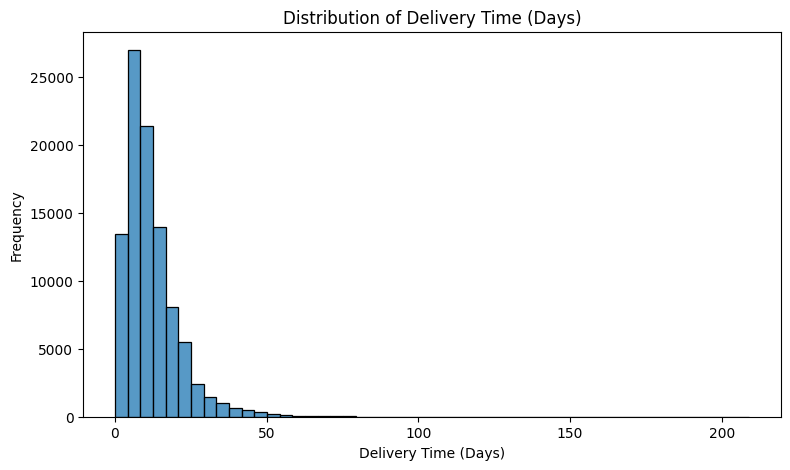

In [56]:
plt.figure(figsize=(9,5))
sns.histplot(orders["delivery_time_days"], bins=50)
plt.title("Distribution of Delivery Time (Days)")
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Frequency")
plt.show()

**Explanatory Analysis:**

Histogram menunjukkan distribusi durasi pengiriman dalam satuan hari.
Sebagian besar pengiriman terkonsentrasi pada rentang sekitar 5–15 hari dengan puncak frekuensi mendekati 10 hari. Namun, terlihat adanya ekor panjang (long tail) di sisi kanan grafik yang menunjukkan beberapa kasus pengiriman dengan durasi sangat lama.

**2. Rata-rata Delivery Time per Tahun**

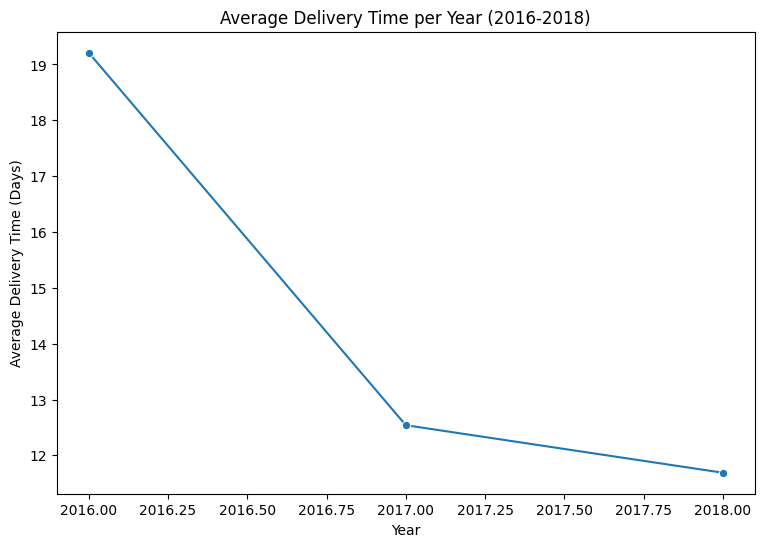

In [57]:
avg_delivery_per_year = (
    orders.groupby("purchase_year")["delivery_time_days"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(9,6))
sns.lineplot(data=avg_delivery_per_year,
             x="purchase_year",
             y="delivery_time_days",
             marker="o")
plt.title("Average Delivery Time per Year (2016-2018)")
plt.xlabel("Year")
plt.ylabel("Average Delivery Time (Days)")
plt.show()

**Explanatory Analysis:**

Grafik garis menunjukkan perubahan rata-rata durasi pengiriman dari tahun ke tahun. Terlihat adanya tren penurunan yang konsisten dari 2016 ke 2018. Penurunan ini mengindikasikan bahwa waktu pengiriman menjadi semakin cepat seiring waktu yang mencerminkan peningkatan efisiensi operasional dan sistem logistik.

**3. Persentase Keterlambatan**

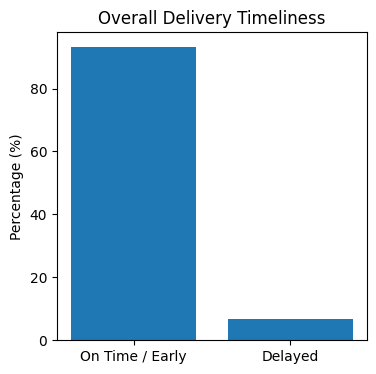

In [58]:
delay_rate = orders["is_delayed"].mean() * 100

plt.figure(figsize=(4,4))
plt.bar(["On Time / Early", "Delayed"],
        [100 - delay_rate, delay_rate])
plt.title("Overall Delivery Timeliness")
plt.ylabel("Percentage (%)")
plt.show()

**Explanatory Analysis:**

Grafik batang memperlihatkan proporsi pengiriman tepat waktu dibandingkan dengan yang mengalami keterlambatan.
Mayoritas besar pengiriman berada pada kategori tepat waktu atau lebih cepat dari estimasi, sementara hanya sebagian kecil yang mengalami keterlambatan.

**4. Kategori Produk dengan Tingkat Delay Tertinggi**

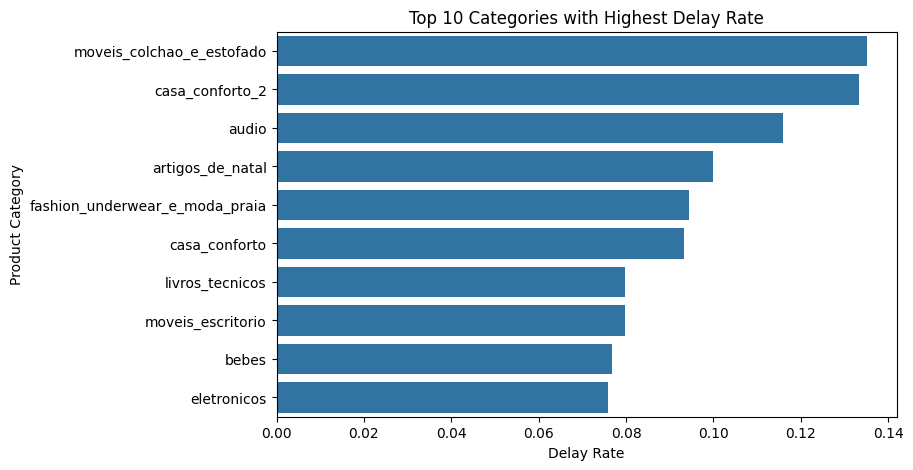

In [59]:
top_delay_category = (
    order_merge.groupby("product_category_name")["is_delayed"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(data=top_delay_category,
            x="is_delayed",
            y="product_category_name")
plt.title("Top 10 Categories with Highest Delay Rate")
plt.xlabel("Delay Rate")
plt.ylabel("Product Category")
plt.show()

**Explanatory Analysis:**

Grafik menunjukkan 10 kategori produk dengan tingkat keterlambatan tertinggi.
Beberapa kategori memiliki proporsi delay yang lebih tinggi dibandingkan kategori lainnya, mengindikasikan adanya tantangan logistik khusus pada jenis produk tertentu.

**Insight Visualisasi Pertanyaan Pertama:**
- Rata-rata waktu pengiriman berada di sekitar 12 hari dengan median 10 hari yang menunjukkan bahwa sebagian besar pengiriman dilakukan dalam waktu relatif cepat dan konsisten. Namun, terdapat beberapa kasus ekstrem dengan durasi sangat lama yang menyebabkan distribusi menjadi skewed ke kanan
- Terjadi peningkatan performa logistik secara signifikan dari tahun 2016 hingga 2018 yang ditunjukkan oleh penurunan rata-rata delivery time dari 19,21 hari (2016) menjadi 11,69 hari (2018). Hal ini menunjukkan adanya perbaikan sistem distribusi dan efisiensi operasional
- Tingkat keterlambatan relatif rendah, yaitu sekitar 6,77% yang berarti lebih dari 93% pengiriman telah dilakukan sesuai atau lebih cepat dari estimasi. Secara umum, performa pengiriman dapat dikategorikan baik
- Beberapa kategori seperti moveis_colchao_e_estofado dan casa_conforto_2 memiliki tingkat keterlambatan tertinggi (sekitar 13%). Kategori ini umumnya berkaitan dengan produk berukuran besar atau furnitur yang memerlukan proses distribusi lebih kompleks sehingga berpotensi meningkatkan risiko keterlambatan

### Pertanyaan 2: Kategori produk apa yang memberikan kontribusi pendapatan (revenue) tertinggi selama periode 2016-2018 serta bagaimana tren penjualannya dari waktu ke waktu?

**1. Kategori Berdasarkan Total Revenue (Top 10)**

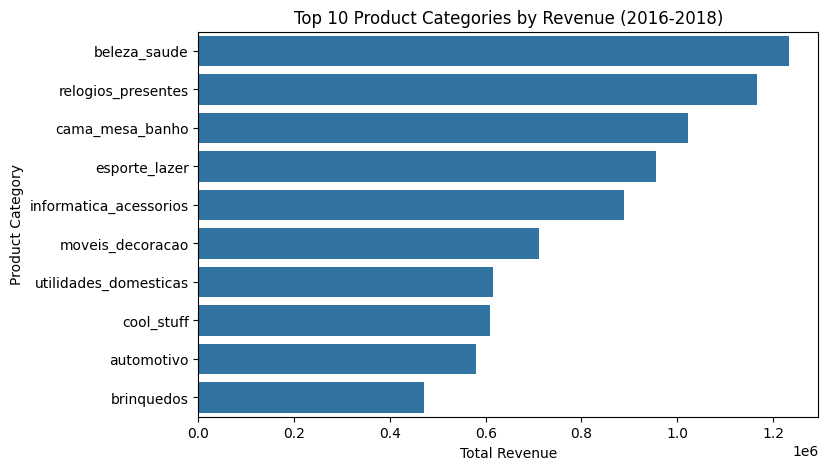

In [60]:
# Filter hanya delivered agar revenue valid
revenue_data = revenue_data[revenue_data["order_status"] == "delivered"]

# Hitung total revenue per kategori
top_revenue_category = (
    revenue_data.groupby("product_category_name")["price"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(data=top_revenue_category,
            x="price",
            y="product_category_name")
plt.title("Top 10 Product Categories by Revenue (2016-2018)")
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")
plt.show()

**Explanatory Analysis:**

Grafik batang menampilkan 10 kategori produk dengan total revenue tertinggi selama periode 2016-2018. Terlihat bahwa kategori beleza_saude berada di posisi teratas, diikuti oleh relogios_presentes dan cama_mesa_banho. Perbedaan panjang batang menunjukkan besarnya kontribusi relatif antar kategori terhadap total pendapatan perusahaan. Visualisasi ini memperjelas bahwa terdapat beberapa kategori utama yang menjadi kontributor signifikan terhadap keseluruhan revenue.

**2. Kontribusi Persentase Revenue (Top 10)**

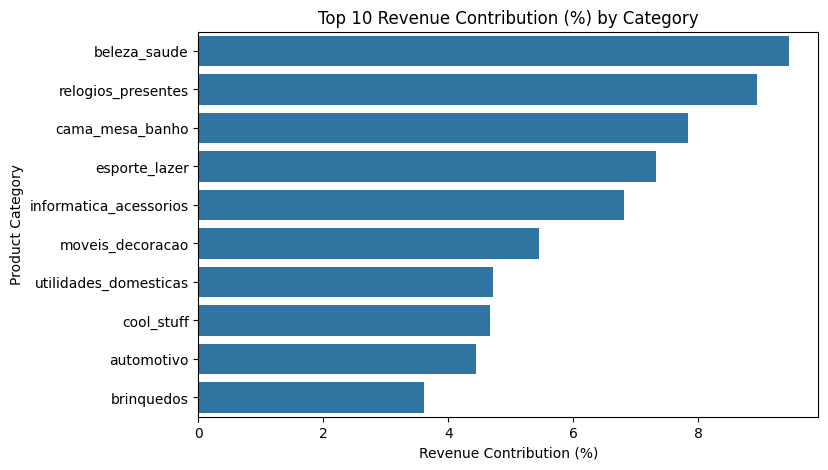

In [61]:
# Hitung persentase kontribusi
revenue_share = (
    revenue_data.groupby("product_category_name")["price"]
    .sum()
    .sort_values(ascending=False)
)

top10_share = (revenue_share / revenue_share.sum() * 100).head(10).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=top10_share,
            x="price",
            y="product_category_name")
plt.title("Top 10 Revenue Contribution (%) by Category")
plt.xlabel("Revenue Contribution (%)")
plt.ylabel("Product Category")
plt.show()

**Explanatory Analysis:**

Grafik menunjukkan persentase kontribusi masing-masing kategori terhadap total revenue. Tidak terdapat satu kategori yang mendominasi secara ekstrem. Sebaliknya, kontribusi revenue tersebar di beberapa kategori utama, dengan kategori teratas menyumbang kurang dari 10% secara individual. Hal ini menunjukkan struktur pendapatan yang relatif terdiversifikasi meskipun terdapat konsentrasi pada beberapa kategori unggulan.

**3. Tren Revenue Tahunan (2016-2018)**

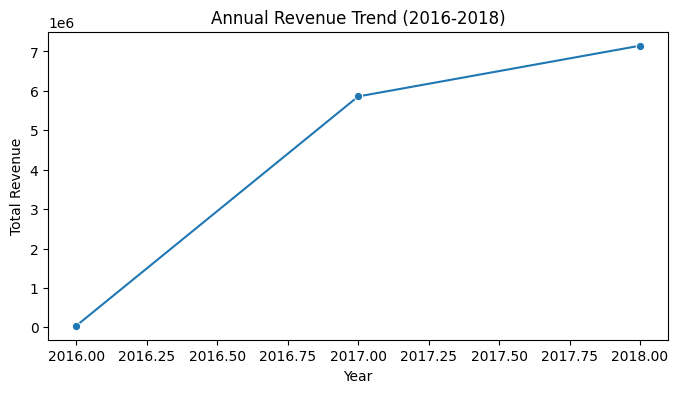

In [62]:
# Revenue per tahun
revenue_per_year = (
    revenue_data.groupby("purchase_year")["price"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(8,4))
sns.lineplot(data=revenue_per_year,
             x="purchase_year",
             y="price",
             marker="o")
plt.title("Annual Revenue Trend (2016-2018)")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.show()

**Explanatory Analysis:**

Grafik garis menunjukkan perkembangan total revenue dari tahun 2016 hingga 2018. Terlihat adanya peningkatan yang sangat signifikan dari 2016 ke 2017, kemudian kembali meningkat pada 2018. Kenaikan ini mencerminkan pertumbuhan volume transaksi dan ekspansi bisnis yang konsisten selama periode analisis.

**Insight Visualisasi Pertanyaan Kedua:**
- Kategori beleza_saude menghasilkan revenue tertinggi (±1,23 juta), diikuti oleh relogios_presentes (±1,17 juta) dan cama_mesa_banho (±1,02 juta). Hal ini menunjukkan bahwa produk kecantikan, aksesoris/jam tangan, serta perlengkapan rumah tangga menjadi kontributor utama pendapatan perusahaan
- Kontribusi revenue relatif terdistribusi di beberapa kategori utama. Kategori teratas menyumbang sekitar 9,45% dari total revenue, sehingga tidak terdapat ketergantungan pada satu kategori tunggal, meskipun terdapat konsentrasi pada 5-10 kategori teratas
- Total revenue meningkat sangat signifikan dari sekitar 40 ribu pada 2016 menjadi 5,86 juta pada 2017, dan kembali meningkat menjadi 7,15 juta pada 2018. Hal ini menunjukkan pertumbuhan bisnis yang kuat dan ekspansi pasar yang pesat
- Lonjakan tajam antara 2016 dan 2017 mengindikasikan fase ekspansi awal, sementara pertumbuhan lanjutan pada 2018 menunjukkan stabilisasi sekaligus peningkatan permintaan yang berkelanjutan

## Analisis Lanjutan (Opsional)

### RFM Analysis

**1. Menentukan Snapshot Date**

Pada tahap ini ditentukan snapshot date yaitu satu hari setelah tanggal transaksi terakhir dalam dataset. Snapshot date digunakan sebagai titik referensi untuk menghitung Recency yaitu jumlah hari sejak terakhir kali pelanggan melakukan pembelian. Karena dataset orders sudah difilter hanya untuk status delivered, maka seluruh transaksi yang digunakan dalam perhitungan RFM merupakan transaksi yang valid.

In [63]:
# Tentukan snapshot date (1 hari setelah transaksi terakhir)
snapshot_date = revenue_data["order_purchase_timestamp"].max() + pd.Timedelta(days=1)

snapshot_date

Timestamp('2018-08-30 15:00:37')

**2. Menghitung Recency, Frequency, dan Monetary**

Pada tahap ini dihitung tiga komponen utama RFM:
- Recency (R): Jumlah hari sejak transaksi terakhir pelanggan hingga snapshot date
- Frequency (F): Jumlah total transaksi unik (order_id) yang dilakukan oleh pelanggan
- Monetary (M): Total nilai pembelian pelanggan (total price)

Perhitungan dilakukan dengan mengelompokkan data berdasarkan customer_id.

In [64]:
rfm = revenue_data.groupby("customer_id").agg({
    "order_purchase_timestamp": lambda x: (snapshot_date - x.max()).days,
    "order_id": "nunique",
    "price": "sum"
}).reset_index()

rfm.columns = ["customer_id", "Recency", "Frequency", "Monetary"]

rfm.head()

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,288,1,89.80
1,000161a058600d5901f007fab4c27140,410,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,548,1,179.99
3,0002414f95344307404f0ace7a26f1d5,379,1,149.90
4,000379cdec625522490c315e70c7a9fb,150,1,93.00


**3. Membuat Skor RFM Menggunakan Quantile (Binning)**

Untuk mengelompokkan pelanggan berdasarkan performanya, setiap komponen RFM dibagi menjadi 4 kelompok menggunakan teknik quantile (qcut).

- Recency: Semakin kecil nilainya semakin baik (pelanggan baru saja membeli), sehingga skornya dibalik
- Frequency: Semakin tinggi semakin baik
- Monetary: Semakin tinggi semakin baik

Skor diberikan dalam skala 1-4.

In [65]:
# Skor Recency (dibalik karena semakin kecil semakin baik)
rfm["R_score"] = pd.qcut(
    rfm["Recency"],
    4,
    labels=[4,3,2,1]
)

# Skor Frequency
rfm["F_score"] = pd.qcut(
    rfm["Frequency"].rank(method="first"),
    4,
    labels=[1,2,3,4]
)

# Skor Monetary
rfm["M_score"] = pd.qcut(
    rfm["Monetary"],
    4,
    labels=[1,2,3,4]
)

rfm.head()

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score
0,00012a2ce6f8dcda20d059ce98491703,288,1,89.80,2,1,3
1,000161a058600d5901f007fab4c27140,410,1,54.90,1,1,2
2,0001fd6190edaaf884bcaf3d49edf079,548,1,179.99,1,1,4
3,0002414f95344307404f0ace7a26f1d5,379,1,149.90,1,1,3
4,000379cdec625522490c315e70c7a9fb,150,1,93.00,3,1,3


**4. Membuat Segmentasi Pelanggan (Rule-Based Clustering)**

Pada tahap ini dilakukan segmentasi pelanggan menggunakan pendekatan manual grouping berbasis aturan bisnis (tanpa machine learning). Segmentasi dilakukan berdasarkan kombinasi skor R, F, dan M untuk mengelompokkan pelanggan ke dalam kategori seperti:
- Champions
- Loyal Customers
- Potential Loyalist
- At Risk
- Others

Pendekatan ini membantu perusahaan memahami struktur basis pelanggan dan menentukan strategi pemasaran yang lebih tepat sasaran.

In [66]:
def segment_customer(row):
    if row["R_score"] == 4 and row["F_score"] == 4 and row["M_score"] == 4:
        return "Champions"
    elif row["F_score"] >= 3 and row["M_score"] >= 3:
        return "Loyal Customers"
    elif row["R_score"] >= 3 and row["F_score"] >= 2:
        return "Potential Loyalist"
    elif row["R_score"] <= 2 and row["F_score"] <= 2:
        return "At Risk"
    else:
        return "Others"

rfm["Segment"] = rfm.apply(segment_customer, axis=1)

rfm["Segment"].value_counts()

,count
Segment,
Others,23889
At Risk,23708
Potential Loyalist,23627
Loyal Customers,22419
Champions,1480


**5. Visualisasi Distribusi Segmen**

Visualisasi berikut menunjukkan distribusi jumlah pelanggan pada masing-masing segmen RFM. Grafik ini membantu mengidentifikasi apakah basis pelanggan didominasi oleh pelanggan aktif dan loyal atau justru oleh pelanggan yang berisiko churn.

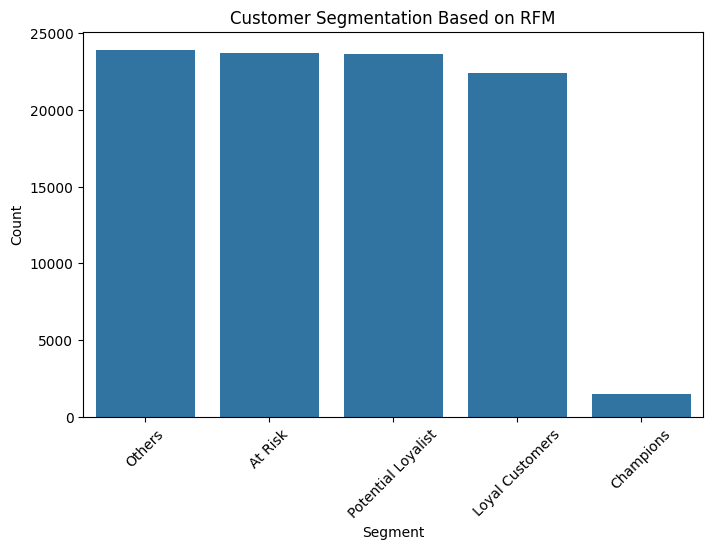

In [67]:
segment_count = rfm["Segment"].value_counts().reset_index()
segment_count.columns = ["Segment", "Count"]

plt.figure(figsize=(8,5))
sns.barplot(data=segment_count, x="Segment", y="Count")
plt.title("Customer Segmentation Based on RFM")
plt.xticks(rotation=45)
plt.show()

**6. Melihat RFM per Metrik serta dari tiap Segmen**

In [68]:
rfm.describe()
rfm["Segment"].value_counts()
rfm.groupby("Segment")["Monetary"].mean()

,Monetary
Segment,
At Risk,136.589323
Champions,369.669081
Loyal Customers,218.628930
Others,91.793122
Potential Loyalist,91.680326


**Insight RFM Analysis:**
- Basis pelanggan didominasi oleh pembeli satu kali (low frequency) yang menunjukkan peluang besar untuk meningkatkan repeat purchase
- Segmen Champions dan Loyal Customers meskipun jumlahnya lebih kecil tetapi memiliki kontribusi revenue jauh lebih besar secara rata-rata. Kelompok ini merupakan aset utama perusahaan
- Segmen At Risk memiliki nilai belanja cukup tinggi. Namun, sudah lama tidak bertransaksi sehingga berpotensi churn. Segmen ini menjadi target utama untuk strategi reaktivasi
- Distribusi pelanggan yang cukup merata di segmen menengah menunjukkan bahwa terdapat potensi konversi dari Potential Loyalist menjadi Loyal Customers apabila diberikan strategi engagement yang tepat

## Conclusion

- Conclusion Pertanyaan 1

Secara keseluruhan, performa logistik perusahaan sudah baik dan terus membaik. Rata-rata delivery time turun signifikan dari 19,21 hari (2016) menjadi 11,69 hari (2018) dengan tingkat keterlambatan rendah (6,77%). Hal ini menunjukkan peningkatan efisiensi operasional yang konsisten. Namun, masih terdapat outlier pengiriman sangat lama serta kategori tertentu seperti moveis_colchao_e_estofado dan casa_conforto_2 yang memiliki tingkat keterlambatan tertinggi (~13%) karena kompleksitas distribusi produk besar.

Perusahaan perlu mengoptimalkan logistik khusus untuk produk bulky melalui kerja sama dengan mitra logistik spesialis, warehouse regional, serta penyesuaian estimasi pengiriman per kategori agar ekspektasi pelanggan lebih realistis. Monitoring khusus pada kategori dengan delay tinggi juga penting untuk menjaga kepuasan pelanggan dan reputasi layanan.

- Conclusion Pertanyaan 2

Revenue perusahaan tumbuh sangat pesat dari 2016 hingga 2018 yang menunjukkan fase ekspansi yang kuat serta pertumbuhan permintaan yang stabil. Kategori beleza_saude, relogios_presentes, dan cama_mesa_banho menjadi kontributor utama. Namun, struktur revenue cukup terdiversifikasi sehingga risiko ketergantungan pada satu kategori relatif rendah. Dari sisi pelanggan, mayoritas masih pembeli satu kali sementara segmen Champions dan Loyal Customers memberikan kontribusi revenue jauh lebih besar.

Fokus utama perusahaan sebaiknya pada strategi retensi dan peningkatan repeat purchase melalui loyalty program, personalized promotion, dan cross-selling pada kategori unggulan. Selain itu, lakukan reaktivasi segmen At Risk dengan campaign khusus serta dorong Potential Loyalist menjadi Loyal Customers untuk meningkatkan Customer Lifetime Value dan menjaga pertumbuhan revenue jangka panjang.

### Data Preparation for Dashboard

Pada tahap ini, dilakukan penggabungan dataset final serta pemilihan kolom yang relevan untuk kebutuhan dashboard Streamlit. Dataset ini akan digunakan sebagai sumber utama visualisasi sehingga dashboard dapat berjalan lebih efisien tanpa melakukan proses cleaning ulang.

In [69]:
# Merge data
main_df = orders.merge(order_items, on="order_id", how="left")
main_df = main_df.merge(products[["product_id","product_category_name"]],
                        on="product_id",
                        how="left")

# Filter delivered
main_df = main_df[main_df["order_status"] == "delivered"].copy()

# Feature yang sudah dibuat
main_df["purchase_year"] = main_df["order_purchase_timestamp"].dt.year

main_df["delivery_time_days"] = (
    main_df["order_delivered_customer_date"] -
    main_df["order_purchase_timestamp"]
).dt.days

main_df["is_delayed"] = (
    main_df["order_delivered_customer_date"] >
    main_df["order_estimated_delivery_date"]
)

# Gabungkan RFM
main_df = main_df.merge(
    rfm[["customer_id","Recency","Frequency","Monetary","Segment"]],
    on="customer_id",
    how="left"
)

# Pilih kolom penting
main_data = main_df[[
    "order_id",
    "customer_id",
    "order_purchase_timestamp",
    "purchase_year",
    "product_category_name",
    "delivery_time_days",
    "is_delayed",
    "price",
    "Recency",
    "Frequency",
    "Monetary",
    "Segment"
]]

# Export CSV
main_data.to_csv("main_data.csv", index=False)

print("Shape:", main_data.shape)

from google.colab import files
files.download("main_data.csv")

Shape: (110173, 12)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>